In [1]:
#@title Import necessary packages and set correct device

import numpy as np
import torch
from torch.utils.data import random_split

from modules.clipseg import ClipSeg
from modules.refcocog import RefCOCOg, RefCOCOgSample
from modules.utilities import visual_grounding_test

%matplotlib inline

if torch.cuda.is_available():
    device = torch.device("cuda")  # CUDA GPU
    print("[INFO] Using cuda.")
elif torch.has_mps:
    device = torch.device("mps")  # Apple Silicon GPU
    print("[INFO] Using MPS.")
else:
    device = torch.device("cpu")
    print("[INFO] No GPU found, using CPU instead.")


[INFO] Using MPS.


In [2]:
#@title Import RefCOCOg dataset and its train/val/test splits

# data_path = "/media/dmmp/vid+backup/Data/refcocog"
data_path = "dataset/refcocog"

dataset = RefCOCOg(ds_path=data_path)

train_ds = RefCOCOg(ds_path=data_path, split='train')
val_ds = RefCOCOg(ds_path=data_path, split='val')
test_ds = RefCOCOg(ds_path=data_path, split='test')

# keep only a toy portion of each split
keep = 0.1
red_dataset, _ = random_split(dataset, [int(keep * len(dataset)), len(dataset) - int(keep * len(dataset))])
red_train_ds, _ = random_split(train_ds, [int(keep * len(train_ds)), len(train_ds) - int(keep * len(train_ds))])
red_val_ds, _ = random_split(val_ds, [int(keep * len(val_ds)), len(val_ds) - int(keep * len(val_ds))])
red_test_ds, _ = random_split(test_ds, [int(keep * len(test_ds)), len(test_ds) - int(keep * len(test_ds))])

print(f"[INFO] Dataset Size: {len(dataset)}")
print(f"[INFO] train split:  {len(train_ds)}")
print(f"[INFO] val split:    {len(val_ds)}")
print(f"[INFO] test split:   {len(test_ds)}")


[INFO] Dataset Size: 49822
[INFO] train split:  42226
[INFO] val split:    2573
[INFO] test split:   5023


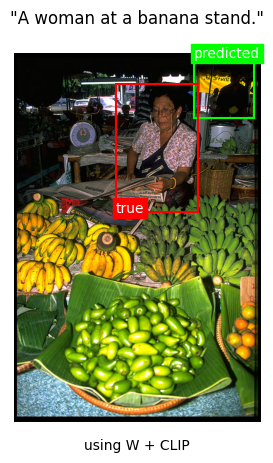

[INFO] Time elapsed: 19.65s


{'IoU': 0.008168376982212067,
 'cosine': 0.21696718037128448,
 'euclidean': 1.2514255046844482,
 'dotproduct': 0.21696718037128448,
 'grounding': 0.0}

In [7]:
#@tile Test ClipSeg on a random sample

idx = np.random.randint(0, len(dataset))

sample = RefCOCOgSample(**dataset[idx])

clipseg = ClipSeg(dataset.categories, method="w", n_segments=(4, 8, 16, 32), q=0.75, quiet=False)

clipseg(sample, sample.sentences[0], show_pipeline=False, show_masks=False, show=True, timeit=True)


---

In [ ]:
#@title Execute testing on the test dataset

visual_grounding_test(clipseg, red_test_ds)
